# <font color="aqua" ><font size="4">A Static Formation Temperature Test (SFTT) during drilling</font></font>
<font size="2">This script aims to demonstrate the calculation of static formation temperature test or SFTT. SFTT is a measurement to get the stable reservoir temperature since the cooling effect of drilling fluids covered the real reservoir temperature. The static formation temperature test use the analytical semilog horner plot and correct method.
</font>


<font size="2">For example, a certain well needs SFTT to be conducted since during drilling, there were conflicting results from the alteration mineralogy. It is decided that a SFTT will be conducted at depth 800 m. Cold water was circulated for <b> 24 hours </b>. After that, the well was allowed to warm-up and the following temperatures as a function of time was recorded. 

| Time (hours) | Temp (degC) |
|----------|----------|
| 6     | 120   |
| 12    | 180   | 
| 18    | 190   |
| 24    | 200   |
| 36    | 205   |

</font>

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Data frame
circulating_time = 24 # hours
heating_time = np.array([6, 12, 18, 24, 36])
temperature = np.array([120, 180, 190, 200, 205])

<font size = 2>
Calculation for the horner time using

$$ \frac{t + dt}{dt} $$

After that use $\log{\frac{t+dt}{dt}}$ to get the natural logrithm number of the horner time
</font>

In [12]:
# Calculation horner time
horner_time = (heating_time+circulating_time)/heating_time
LN_horner_time = np.log(horner_time) #for regression
print(f"Horner time array:{horner_time}")
print(f"Natural log Horner time{LN_horner_time}")

Horner time array:[5.         3.         2.33333333 2.         1.66666667]
Natural log Horner time[1.60943791 1.09861229 0.84729786 0.69314718 0.51082562]


<font size = 2>

If parameters known such as rock thermal conductivity $K = 2500\, W/m.K$, rock specific heat $C_p = 1000\, J/kg.K$, rock density $\rho = 2400 \, kg/m^3$, and the wellbore diameter is $d_w = 12 \, \tfrac{1}{4}"$

The dimensionless circulating time is 
$$ t_{CD} = \frac{K\,t_C}{C_p \, \rho \, r_w^2}$$
</font>

In [13]:
K = 2500 # Rock conductivity (W/K.m)
Cp = 1000 # Specific heat (J/kg.K)
rho = 2400 # Density of rock (kg/m3)
r_w = (12.25/2) * 0.0254  # Wellbore radius (m)
# Dimensionless circulating time
t_CD =(K*circulating_time)/(Cp*rho*r_w**2)

<font size = 2> 
After that, regression linear would be conducted for the last 4 points of data to get the trusted outcome 
</font>

In [14]:
# Choosing the last 4 data
x_ht = LN_horner_time[-4:] #ht stands for horner time
y_temp = temperature[-4:]

# Defining regression linear
def regression_linear (X, Y):
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    #Slope m
    b1 = np.sum((X - X_mean) * (Y - Y_mean)) / np.sum((X - X_mean)**2) 
    # Y-intercept
    b0 = Y_mean - (b1 * X_mean) 
    # regression line
    Y_pred = b1*X + b0 
    # Calculate the R-squared value
    ss_total = np.sum((Y - np.mean(Y))**2)
    ss_residual = np.sum((Y - Y_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)

    return b1, b0, Y_pred, r_squared

b1, b0, Y_pred, r_squared = regression_linear(x_ht, y_temp)


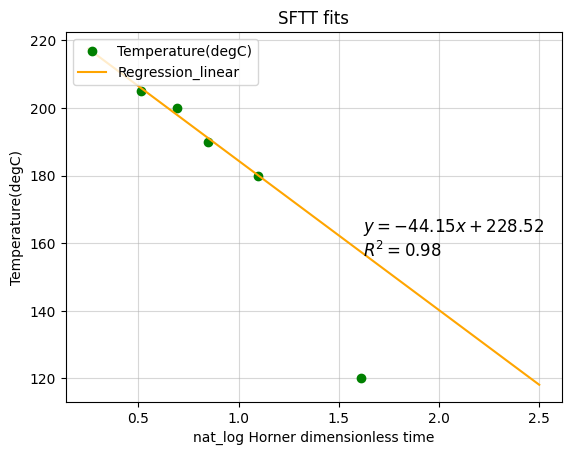

In [23]:
### Ploot the semilog plot
# First x, y
fig, ax1 = plt.subplots()
ax1.plot(LN_horner_time,temperature, 'o', color='green', label='Temperature(degC)', linestyle='none')
ax1.set_xlabel('nat_log Horner dimensionless time')
ax1.set_ylabel('Temperature(degC)')

# Second set x, y
x_reg_linear = np.linspace(0.25,2.5, 100)
y_reg_linear = b1*x_reg_linear + b0
ax1.plot(x_reg_linear, y_reg_linear, color='orange', label='Regression_linear') # regresion linear
ax1.legend(loc='upper left')
ax1.grid(True, which='both', alpha=0.5)

#Showing the plot
text = f"$y = {b1:.2f}x + {b0:.2f}$\n$R^2 = {r_squared:.2f}$"
ax = plt.gca()
ax.text(0.60, 0.50, text, transform=ax.transAxes, 
        fontsize=12, color="black", verticalalignment='top')
plt.title('SFTT fits')
plt.show()

<font size = 2>
In order to define the final temperature, we use the slope and Y-intercept and involve the horner correction factor for the SFTT.
</font>

In [20]:
#Final Temperature calculation by involving the correction factor
LN_horner_slope = -b1*np.log(10) #b1 is the slope
lowest_horner_time  = np.min(horner_time)
# Correction factor if t
r_12 = 0.055*t_CD**(-0.373)
r_25 = 0.276*t_CD**(-0.403)
r_510 = 0.719*t_CD**(-0.366)

#Correction factor
if lowest_horner_time <= 2: #correction factor if lowest horner time from 1-2
    cor_fac = r_12
elif lowest_horner_time <=5:#correction factor if lowest horner time from 2-5
    cor_fac = r_25
else: #correction factor if lowest horner time from 5 to 10
    cor_fac = r_510

temp_correction = LN_horner_slope*cor_fac

final_calculated_temp = b0 + temp_correction #b0 is the Y-intercept

print(f"The temperature at the depth of 800 m is {final_calculated_temp:.3f} degC")

The temperature at the depth of 800 m is 234.043 degC


<font size = 2>As the result, it can be shown that the temperature of the reservoir at the depth of 800 m is 234 degC </font>